In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\clustering project\SF_2024.xlsx")

In [34]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,31137,2024,5027,AJ Griffin,NaN,SF,20,2,NBA,ATL,11,0,101,10,33,0.303,8,24,0.333,2,9,0.222,0.424,2,2,1.000,2,8,10,3,1,0,4,5,30
1,31140,2024,4805,Aaron Nesmith,NaN,SF,24,4,NBA,IND,15,1,351,57,108,0.528,25,57,0.439,32,51,0.627,0.644,17,26,0.654,15,34,49,15,17,8,9,49,156
2,31147,2024,5109,Alex Fudge,NaN,SF,20,1,NBA,LAL,4,0,14,1,6,0.167,0,2,0.000,1,4,0.250,0.167,2,2,1.000,2,0,2,0,0,0,1,1,4
3,31151,2024,5111,Amen Thompson,NaN,SF,21,1,NBA,HOU,4,0,67,9,22,0.409,2,11,0.182,7,11,0.636,0.455,5,8,0.625,1,10,11,6,2,1,6,9,25
4,31152,2024,4690,Amir Coffey,NaN,SF,26,5,NBA,LAC,10,0,58,4,12,0.333,0,3,0.000,4,9,0.444,0.333,4,4,1.000,2,5,7,3,1,0,2,5,12


In [35]:
pd.set_option('display.max_columns', None)

In [36]:
print(data)

     seas_id  season  player_id            player  birth_year pos  age  \
0      31137    2024       5027        AJ Griffin         NaN  SF   20   
1      31140    2024       4805     Aaron Nesmith         NaN  SF   24   
2      31147    2024       5109        Alex Fudge         NaN  SF   20   
3      31151    2024       5111     Amen Thompson         NaN  SF   21   
4      31152    2024       4690       Amir Coffey         NaN  SF   26   
..       ...     ...        ...               ...         ...  ..  ...   
102    31600    2024       4209  Tim Hardaway Jr.         NaN  SF   31   
103    31602    2024       4570      Torrey Craig         NaN  SF   33   
104    31612    2024       4678    Troy Brown Jr.         NaN  SF   24   
105    31628    2024       4684     Yuta Watanabe         NaN  SF   29   
106    31632    2024       5024   Ziaire Williams         NaN  SF   22   

     experience   lg   tm   g  gs   mp  fg  fga  fg_percent  x3p  x3pa  \
0             2  NBA  ATL  11   0  10

In [37]:
pg_columns_to_keep =   ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']


# Keep only the specified columns for a point guard
filtered_df_pg = data[pg_columns_to_keep]

# Display the resulting DataFrame
print(filtered_df_pg)

     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0     30    8    1    2    3   10    0   0         0.424       0.303   
1    156   25   17   15   15   49    8   1         0.644       0.528   
2      4    0    0    2    0    2    0   0         0.167       0.167   
3     25    2    2    1    6   11    1   0         0.455       0.409   
4     12    0    1    2    3    7    0   0         0.333       0.333   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
102  285   58    4    6   27   57    0   0         0.545       0.420   
103   98   14   12   34   22   97    8   7         0.468       0.394   
104   62    9    4   10    9   39    1   1         0.523       0.419   
105   72   18    5    8    8   33    6   0         0.500       0.359   
106  145   22    8   12   22   77    5   8         0.473       0.389   

     x3p_percent  
0          0.333  
1          0.439  
2          0.000  
3          0.182  
4          0.000  
..           ...  
10

In [38]:
filtered_df_pg_placeholder = filtered_df_pg.fillna(-1)

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

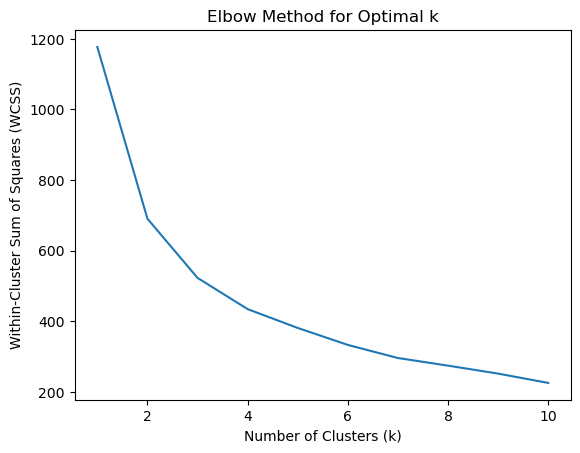

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'filtered_df_pg_placeholder' is your preprocessed DataFrame

# Impute any remaining missing values (if any)
imputer = SimpleImputer(strategy='mean')
filtered_df_pg_imputed = pd.DataFrame(imputer.fit_transform(filtered_df_pg_placeholder), columns=filtered_df_pg_placeholder.columns)

# Standardize the data
scaler = StandardScaler()
filtered_df_pg_standardized = scaler.fit_transform(filtered_df_pg_imputed)

# Use the Elbow Method to determine the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(filtered_df_pg_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [40]:
optimal_k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(filtered_df_pg_standardized)

# Add the cluster labels to your DataFrame
filtered_df_pg_placeholder['Cluster'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(filtered_df_pg_placeholder)

     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0     30    8    1    2    3   10    0   0         0.424       0.303   
1    156   25   17   15   15   49    8   1         0.644       0.528   
2      4    0    0    2    0    2    0   0         0.167       0.167   
3     25    2    2    1    6   11    1   0         0.455       0.409   
4     12    0    1    2    3    7    0   0         0.333       0.333   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
102  285   58    4    6   27   57    0   0         0.545       0.420   
103   98   14   12   34   22   97    8   7         0.468       0.394   
104   62    9    4   10    9   39    1   1         0.523       0.419   
105   72   18    5    8    8   33    6   0         0.500       0.359   
106  145   22    8   12   22   77    5   8         0.473       0.389   

     x3p_percent  Cluster  
0          0.333        2  
1          0.439        1  
2          0.000        2  
3          0.182       

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


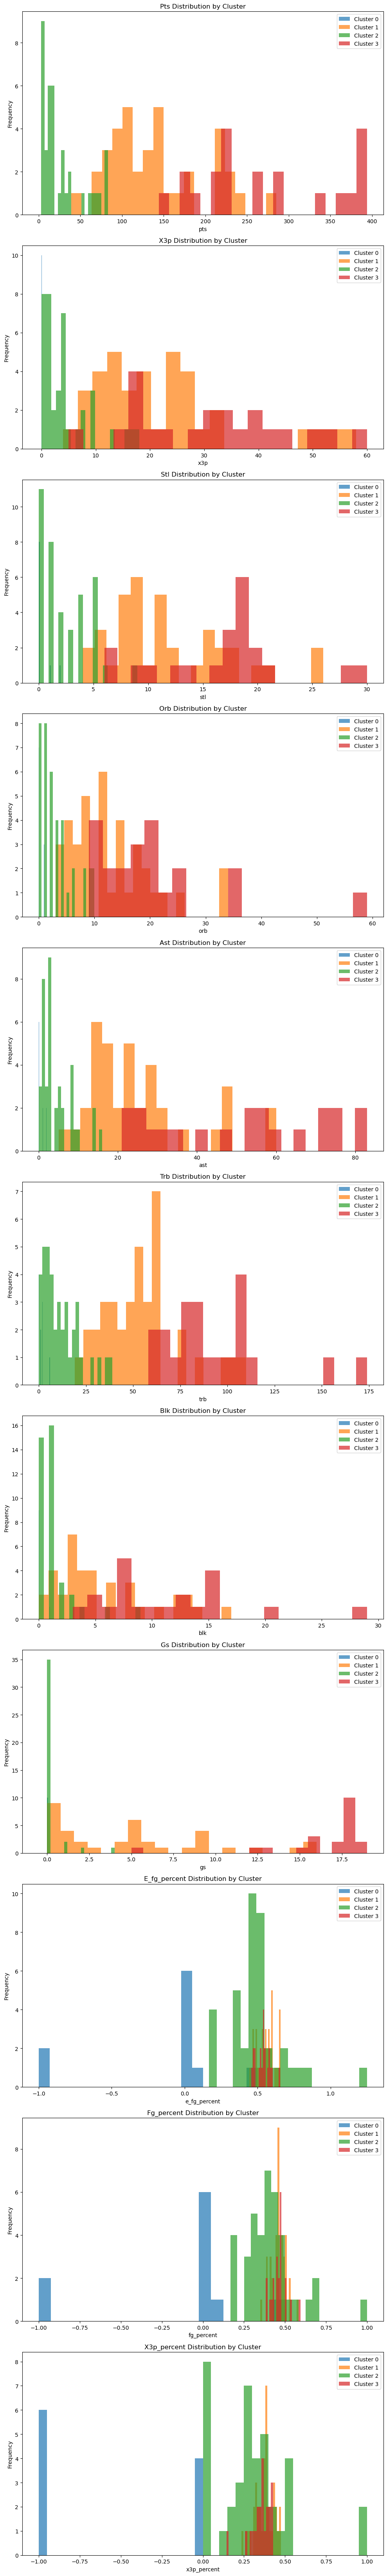

In [41]:
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 6 * len(features_to_plot)))

# Plot each feature for each cluster
for i, feature in enumerate(features_to_plot):
    for cluster in range(optimal_k):
        # Select data for the current cluster
        cluster_data = filtered_df_pg_placeholder[filtered_df_pg_placeholder['Cluster'] == cluster]
        
        # Plot the feature for the current cluster
        axes[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')

    # Set labels and title for each subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_title(f'{feature.capitalize()} Distribution by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()